**Name : Abeer Abdelnasser Ahmed Wafa**

**The Sparks Foundation (Data Science & Business Analysis Intern (July_2022)**

**Task 2 : Prediction Using Unsupervised ML**

**Data Link : https://bit.ly/3kXTdox**

In [1]:
# import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data Exploration**

In [2]:
# Load the dataset 
Data_Reading = pd.read_csv('Iris.csv')
print('Data Loaded')
Data_Reading.head()

Data Loaded


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Data_Reading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
Data_Reading.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Data Cleaning**

In [5]:
Data_Reading = Data_Reading.drop('Id',axis=1)

In [6]:
Data_Reading.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

*Data is clean*

**Data Visualization**

In [7]:
Data_Reading["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

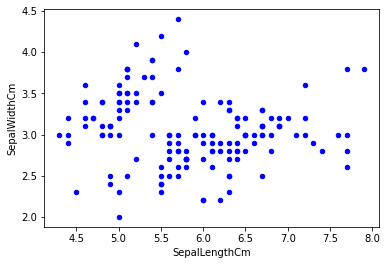

In [8]:
Data_Reading.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color='blue')

*In the above graph, you can see there seems to be a split between portions of the data (data points with large sepal width but lower sepal length seem to be clustered together). Also, there look to be a few potential outliers toward the top right*

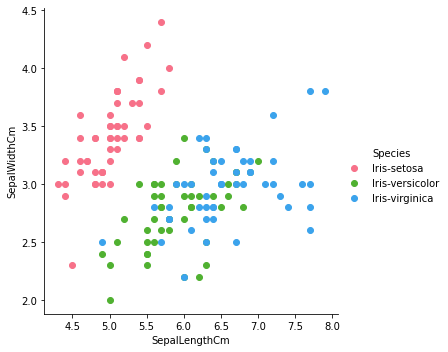

In [9]:
#color the scatterplot by species
sns.FacetGrid(Data_Reading, hue="Species", palette="husl", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

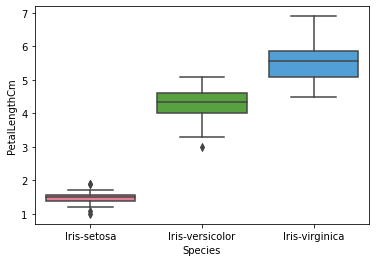

In [10]:
sns.boxplot(x="Species", y="PetalLengthCm", palette="husl", data=Data_Reading)

*From the boxplot above alone, we can see that each Iris species is clearly separable based upon petal length, with just a bit of potential overlap in the Iris-versicolor and Iris virgnica. This theme will reappear in almost all of the other charts we create. We can see with the naked eye, just by visualization, at least one way to differentiate all three species*

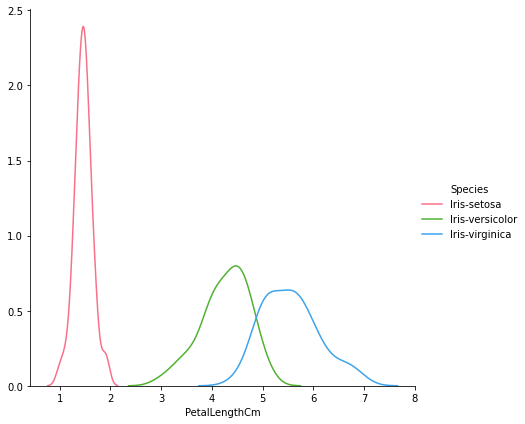

In [11]:
sns.FacetGrid(Data_Reading, hue="Species", palette="husl", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()
#The higher a line goes on the y-axis, the denser the data is at that x-axis number

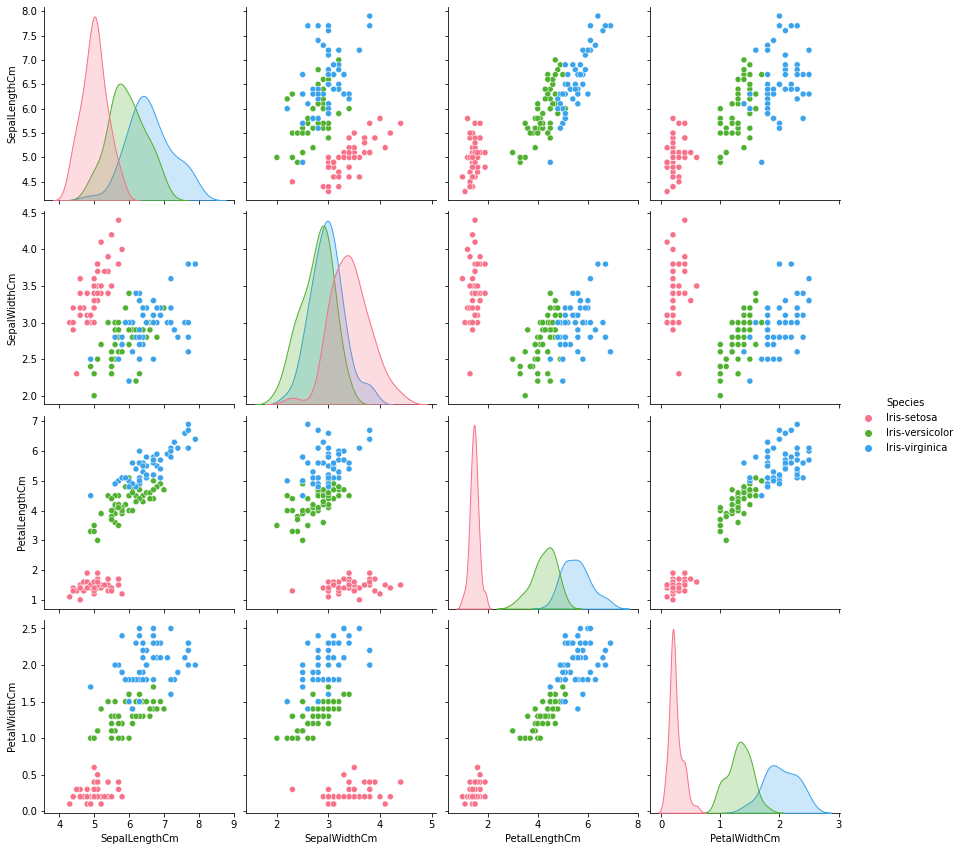

In [12]:
sns.pairplot(Data_Reading,hue="Species", palette="husl", size=3)

*From the pairplot, we'll see that the Iris-setosa species is separataed from the other
two across all feature combinations*

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

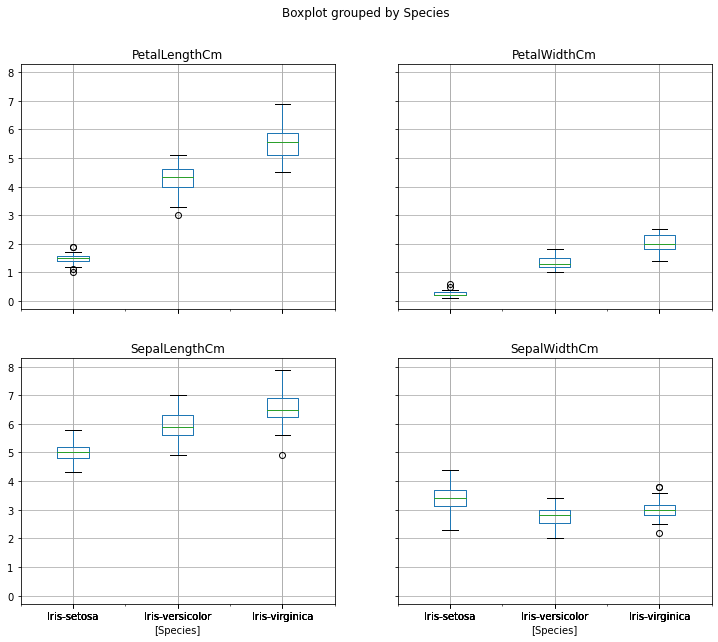

In [13]:
#visalize each feature out by species
Data_Reading.boxplot(by="Species", figsize=(12, 10))

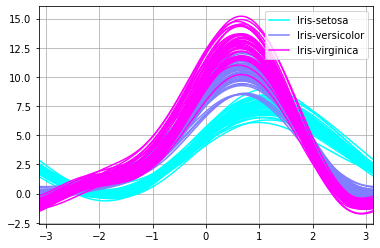

In [14]:
#Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting the series 
pd.plotting.andrews_curves(Data_Reading,"Species",colormap='cool')
plt.show()

<AxesSubplot:>

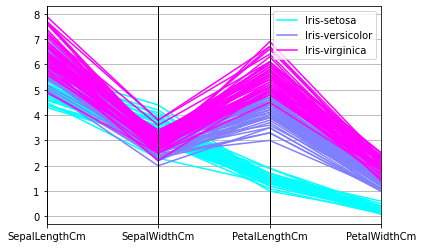

In [15]:
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
pd.plotting.parallel_coordinates(Data_Reading,"Species",colormap='cool')

<AxesSubplot:>

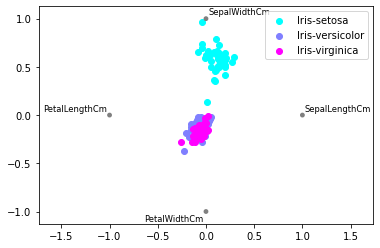

In [16]:
# radviz puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
pd.plotting.radviz(Data_Reading,"Species",colormap='cool')

**Data Modeling with Kmeans**

In [17]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

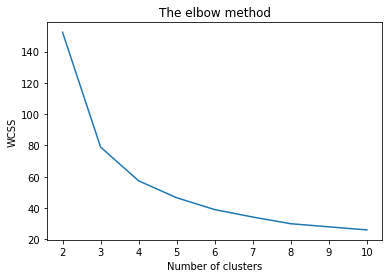

In [18]:
# Finding the optimum number of clusters for k-means classification

x = Data_Reading.iloc[:,[0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

*The optimum numper of clusters is 3*

In [19]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

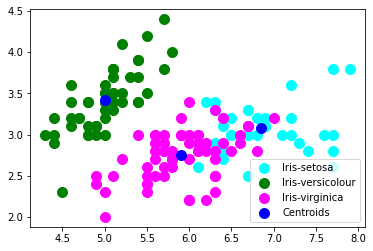

In [20]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'magenta', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()